In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # To supress warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

In [2]:
States = pd.read_csv("States.csv")

In [3]:
States

,Unnamed: 0,State,Population,Political Party,Total_Cases,Total_Deaths,Total_Tests,Unemployment
0,0,Alabama,4903185,Republican,469319,8449,2290060,3.90000
1,1,Alaska,731545,Republican,53279,277,1536911,5.80000
2,2,Arizona,7278717,Republican,775622,13948,3941264,7.50000
3,3,Arkansas,3017825,Republican,304723,5050,2893455,4.20000
4,4,California,39512223,Democratic,3375571,43318,43433104,9.00000
5,5,Colorado,5758736,Democratic,402714,5704,2437626,8.40000
6,6,Connecticut,3565287,Democratic,259372,7214,5943683,8.00000
7,7,Delaware,973764,Democratic,79546,1191,592725,5.30000
8,8,Florida,21477737,Republican,1763873,27460,19474886,6.10000
9,9,Georgia,10617423,Republican,932912,14858,7048087,5.60000


In [19]:
temp=States[States['Population'] > 10000000]
temp[temp['Political Party'] == "Democratic"]

,Unnamed: 0,State,Population,Political Party,Total_Cases,Total_Deaths,Total_Tests,Unemployment
4,4,California,39512223,Democratic,3375571,43318,43433104,9.00000
12,12,Illinois,12671821,Democratic,1141219,21603,16464740,7.60000
31,31,New York,19453561,Democratic,1495704,44588,32986290,8.20000
32,32,North Carolina,10488084,Democratic,787349,9841,9148199,6.20000
37,37,Pennsylvania,12801989,Democratic,867502,22325,9407717,6.70000


In [5]:
States.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       50 non-null     int64  
 1   State            50 non-null     object 
 2   Population       50 non-null     int64  
 3   Political Party  50 non-null     object 
 4   Total_Cases      50 non-null     int64  
 5   Total_Deaths     50 non-null     int64  
 6   Total_Tests      50 non-null     int64  
 7   Unemployment     50 non-null     float64
dtypes: float64(1), int64(5), object(2)
memory usage: 3.2+ KB


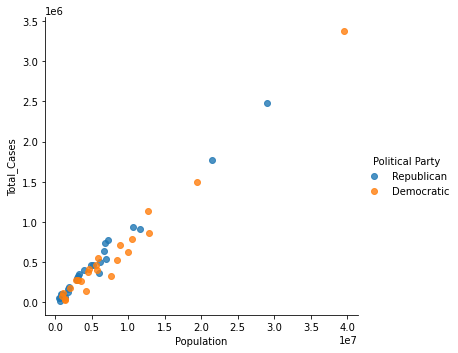

In [4]:
sns.lmplot(x='Population', y='Total_Cases',data=States,fit_reg=False,hue='Political Party')
#plt.yscale("log")
#plt.xscale("log")
plt.show()

<AxesSubplot:xlabel='Unemployment', ylabel='State'>

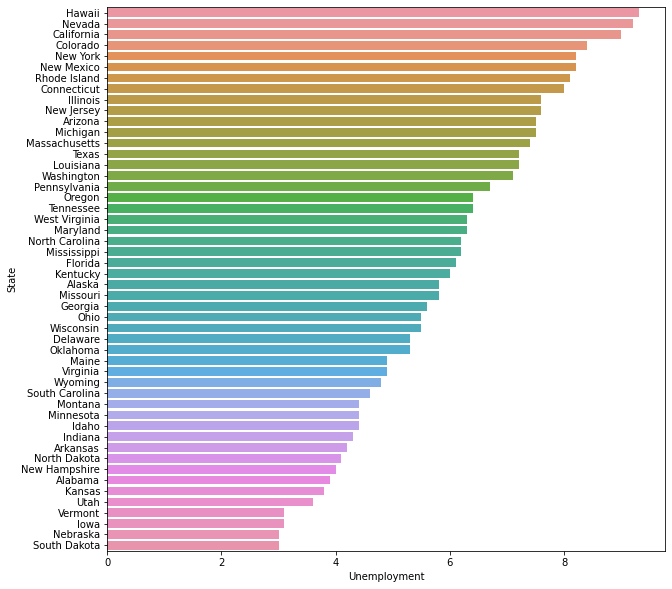

In [21]:
plt.figure(figsize = (10,10)) # To resize the plot
#sns.barplot(x="Unemployment", y="State", hue="Political Party", data=States.sort_values("Unemployment", ascending=False))
sns.barplot(x="Unemployment", y="State", data=States.sort_values("Unemployment", ascending=False))


In [32]:
data <- data.frame(
  name=letters[1:5],
  value=sample(seq(4,15),5)
)

# The most basic barplot you can do:
#barplot(height=data$value, names=data$name)

NameError: name 'data' is not defined